## Introduction to Data Science | 4022 | Dr. Bahrak & Dr. Yaghoobzadeh
## CA4
***
### Amirreza Akbari | 810899045
### Reza Baghestani | 810899046
### Hananeh Jamali | 810899053
***
### 1402/02/05

## Install & Import Libraries

In [2]:
import importlib.util

# Check if scikit-learn is installed
if importlib.util.find_spec("sklearn") is None:
    # Install scikit-learn
    !pip install scikit-learn

# Check if pandas is installed
if importlib.util.find_spec("pandas") is None:
    # Install pandas
    !pip install pandas
    
# Check if matplotlib is installed
if importlib.util.find_spec("matplotlib") is None:
    # Install matplotlib
    !pip install matplotlib

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Warm-Up


----------------------------------------------     STEP 1     ----------------------------------------------
dataset successfully loaded and saved into a CSV file

----------------------------------------------     STEP 2     ----------------------------------------------
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953

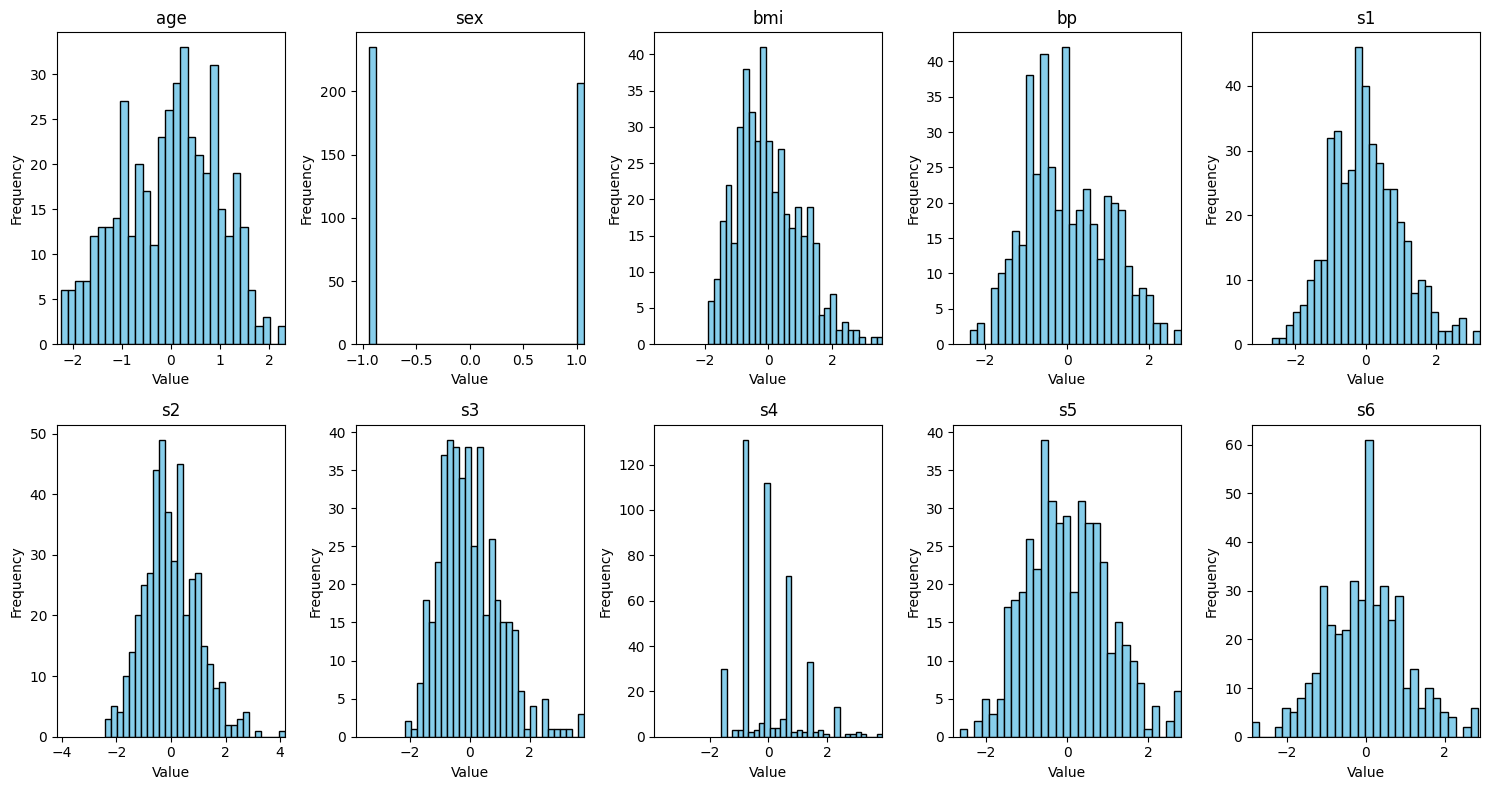


----------------------------------------------     STEP 6     ----------------------------------------------
data successfully split into training and testing sets

----------------------------------------------     STEP 7     ----------------------------------------------
Number of instances in training set: 419
Number of instances in testing set: 23


In [3]:
print("\n----------------------------------------------     STEP 1     ----------------------------------------------")
# Step 1: Load the diabetes dataset from scikit-learn
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert the dataset to a DataFrame for easier manipulation
diabetes_df = pd.DataFrame(X, columns=diabetes.feature_names)

# Save the DataFrame to a CSV file
diabetes_df.to_csv('diabetes_dataset.csv', index=False)

print("dataset successfully loaded and saved into a CSV file")

print("\n----------------------------------------------     STEP 2     ----------------------------------------------")
# Step 2: Display the first ten rows of the dataset
print(diabetes_df.head(10))

print("\n----------------------------------------------     STEP 3     ----------------------------------------------")
# Step 3: Print the data types of each feature
print(diabetes_df.dtypes)

print("\n----------------------------------------------     STEP 4     ----------------------------------------------")
# Step 4: Check for any missing values in the dataset
missing_values = diabetes_df.isnull().sum().sum()
if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print("There are missing values in the dataset.")
    print("Missing values are replaced with NAN value.")
    # Replace missing values with NaN
    diabetes_df.replace(-1, np.nan, inplace=True)

print("\n----------------------------------------------     STEP 5     ----------------------------------------------")
# Step 5: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the mean, standard deviation, minimum, median and maximum of each feature after normalization
mean_normalized = X_scaled.mean(axis=0)
std_dev_normalized = X_scaled.std(axis=0)
min_values = X_scaled.min(axis=0)
median_values = np.median(X_scaled, axis=0)
max_values = X_scaled.max(axis=0)

# Create a DataFrame to display the statistics after normalization
stats_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Mean': mean_normalized,
    'Std Dev': std_dev_normalized,
    'Minimum': min_values,
    'Median': median_values,
    'Maximum': max_values
})

# Display the DataFrame
print(stats_df)

# Create a grid of subplots with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot each feature
for i, (feature, data) in enumerate(zip(diabetes.feature_names, X_scaled.T)):
    # Determine the x-limits based on the maximum absolute value
    x_limit = max(abs(np.min(data)), abs(np.max(data)))
    axes[i].hist(data, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(-x_limit, x_limit)  # Set x-limits dynamically

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

print("\n----------------------------------------------     STEP 6     ----------------------------------------------")
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)
print("data successfully split into training and testing sets")

print("\n----------------------------------------------     STEP 7     ----------------------------------------------")
# Step 7: Display the number of instances in both the training and testing datasets
print("Number of instances in training set:", X_train.shape[0])
print("Number of instances in testing set:", X_test.shape[0])


## Main Task

### Part 1: Functions' Implementation

In [5]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error (MSE) between the true and predicted values.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True target values.
    y_pred : array-like of shape (n_samples,)
        Predicted target values.

    Returns:
    mse : float
        Mean Squared Error (MSE) between y_true and y_pred.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def mean_absolute_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Error (MAE) between the true and predicted values.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True target values.
    y_pred : array-like of shape (n_samples,)
        Predicted target values.

    Returns:
    mae : float
        Mean Absolute Error (MAE) between y_true and y_pred.
    """
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) between the true and predicted values.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True target values.
    y_pred : array-like of shape (n_samples,)
        Predicted target values.

    Returns:
    rmse : float
        Root Mean Squared Error (RMSE) between y_true and y_pred.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def r2_score(y_true, y_pred):
    """
    Calculate the R² Score (Coefficient of Determination) between the true and predicted values.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True target values.
    y_pred : array-like of shape (n_samples,)
        Predicted target values.

    Returns:
    r2 : float
        R² Score (Coefficient of Determination) between y_true and y_pred.
    """
    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)
    # Calculate R² Score
    r2 = 1 - (rss / tss)
    return r2
    

### Part 2: Building and Training the Linear Regression Model

In [11]:
class LinearRegressionFromScratch:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fit the linear regression model to the training data.

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Training data.
        y : array-like of shape (n_samples,)
            Target values.
        """
        # Add a column of ones to X for the intercept term
        X_augmented = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the normal equation
        beta = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y

        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, X):
        """
        Predict target values for the given data.

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Data to be predicted.

        Returns:
        y_pred : array-like of shape (n_samples,)
            Predicted target values.
        """
        if self.coef_ is None or self.intercept_ is None:
            raise ValueError("Model has not been trained yet. Call fit() first.")

        # Add a column of ones to X for the intercept term
        X_augmented = np.column_stack((np.ones(len(X)), X))

        # Compute predictions
        y_pred = X_augmented @ np.concatenate(([self.intercept_], self.coef_))

        return y_pred

    def score(self, X, y):
        """
        Compute the R² score of the model on the given data.

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Data to be evaluated.
        y : array-like of shape (n_samples,)
            Target values.

        Returns:
        r2 : float
            R² score (Coefficient of Determination).
        """
        y_pred = self.predict(X)
        rss = np.sum((y - y_pred) ** 2)
        tss = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (rss / tss)
        return r2

# Step 1: Prepare the Data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Instantiate the Model
model = LinearRegressionFromScratch()
# model = LinearRegression()    # imported linear regression model from scikit-learn library.

# Step 4: Train the Model
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R² Score:", train_score)
print("Testing R² Score:", test_score)


Training R² Score: 0.5279193863361498
Testing R² Score: 0.4526027629719188
